In [1]:
import fsspec
import xarray as xr
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import pyqg_explorer.dataset.forcing_dataset as forcing_dataset
import pyqg_explorer.models.base_model as base_model

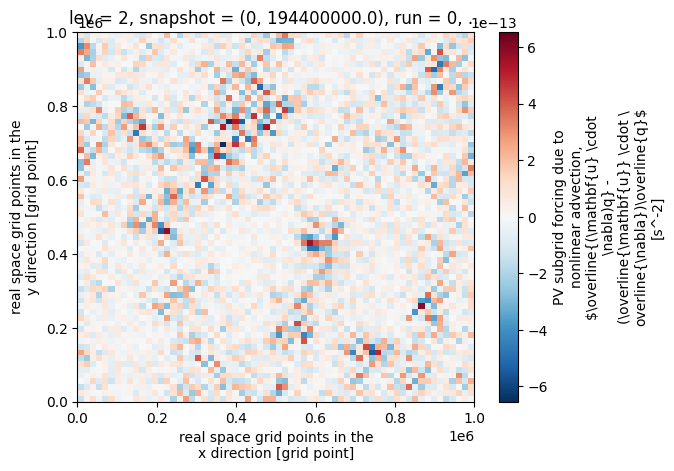

In [2]:
data_full=xr.open_zarr(fsspec.get_mapper(f'/scratch/zanna/data/pyqg/publication/eddy/forcing1.zarr'), consolidated=True)
data_forcing=data_full.q_subgrid_forcing.isel(lev=1)
data_forcing=data_forcing.stack(snapshot=("run","time"))
data_forcing=data_forcing.transpose("snapshot","y","x")
data_forcing.isel(snapshot=54).plot()

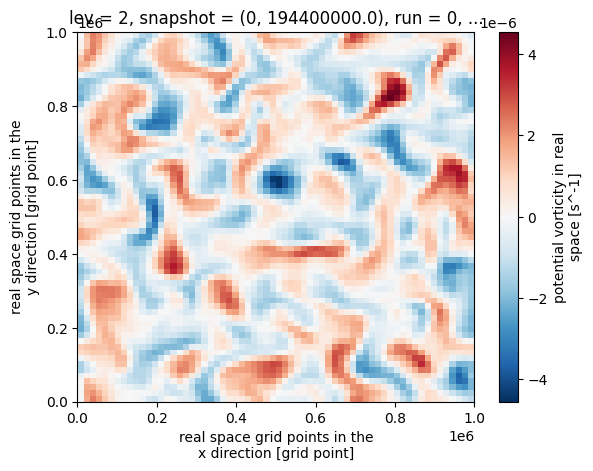

In [3]:
data_q=data_full.q.isel(lev=1)
data_q=data_q.stack(snapshot=("run","time"))
data_q=data_q.transpose("snapshot","y","x")
data_q.isel(snapshot=54).plot()

In [4]:
dataset=forcing_dataset.ForcingDataset(data_q,data_forcing)

In [5]:
train_loader = DataLoader(
    dataset,
    batch_size=32,
    sampler=SubsetRandomSampler(dataset.train_idx),
)
valid_loader = DataLoader(
    dataset,
    batch_size=32,
    sampler=SubsetRandomSampler(dataset.valid_idx),
)

In [6]:
model=base_model.AndrewCNN(1,1)

In [7]:
model.parameters

<bound method Module.parameters of AndrewCNN(
  (conv): Sequential(
    (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (13): ReLU()
    (14): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (16): ReLU()
    (17): BatchNorm2d(32, ep

In [8]:
data=next(iter(train_loader))

In [9]:
model(data[0])

RuntimeError: Given groups=1, weight of size [128, 1, 5, 5], expected input[1, 32, 64, 64] to have 1 channels, but got 32 channels instead